In [1]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\doctorat\\code\\docGL\\amdahl_benchmarks\\results"
using DataFrames, SolverBenchmark, SolverTools, JLD2, Plots

function open_file(path)
    file = jldopen(path, "r")
    df_out = file["stats"]
    close(file)
    return df_out
end

open_file (generic function with 1 method)

In [28]:
rip_mono = open_file(string(res_path, "\\G-2021-03_lp_mono.jld2"));

# rip_mono1 = open_file(string(res_path, "\\ripqp_mono_1_lp.jld2"));
rip_mono1 = open_file(string(res_path, "\\ripqp_mono_PC_lp.jld2"));
rip_mono_nrtol1 = open_file(string(res_path, "\\ripqp_mono_nrtol_1_lp.jld2"));
rip_mono_d1 = open_file(string(res_path, "\\ripqp_dynamic_1_lp.jld2"));
rip_mono_c1 = open_file(string(res_path, "\\ripqp_ccorr_1_lp.jld2"));
rip_multi1 = open_file(string(res_path, "\\ripqp_multi_1_lp.jld2"));
rip_multi_d1 = open_file(string(res_path, "\\ripqp_multi_dynamic_1_lp.jld2"));

# K2_5
rip_monoK251 = open_file(string(res_path, "\\ripqp_mono_K25_1_lp.jld2"));
rip_mono_dK251 = open_file(string(res_path, "\\ripqp_dynamic_K25_1_lp.jld2"));
rip_multiK251 = open_file(string(res_path, "\\ripqp_multi_K25_1_lp.jld2"));
rip_multi_dK251 = open_file(string(res_path, "\\ripqp_multi_dynamic_K25_1_lp.jld2"));

# K2_5 one step
rip_monoosK251 = open_file(string(res_path, "\\ripqp_mono_osK25_1_lp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoosK252 = open_file(string(res_path, "\\ripqp_mono_osK25_2_lp.jld2")); # r, γ =  T(0.95), T(0.1)
rip_monoIPFK21 = open_file(string(res_path, "\\ripqp_mono_IPFK2_1_lp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoIPFK22 = open_file(string(res_path, "\\ripqp_mono_IPFK2_2_lp.jld2")); # r, γ =  T(0.95), T(0.1)

# comparisons zoom1 & refinement
rip_monoK2 = open_file(string(res_path, "\\ripqp_mono_K2_lp.jld2"));
rip_monoK22 = open_file(string(res_path, "\\ripqp_mono_K22_lp.jld2"));
rip_multiK2 = open_file(string(res_path, "\\ripqp_multi_K2_lp.jld2"));
rip_mono_z = open_file(string(res_path, "\\ripqp_mono_z_lp.jld2")); # ϵ_rbz = 1e-3
rip_mono_z2 = open_file(string(res_path, "\\ripqp_mono_z2_lp.jld2")); # ϵ_rbz = 1e-7
rip_multi_z = open_file(string(res_path, "\\ripqp_multi_z_lp.jld2")); # ϵ_pdd32 = 1e-4
rip_multi_z2 = open_file(string(res_path, "\\ripqp_multi_z2_lp.jld2")); # ϵ_pdd32 = 1.0 
rip_mono_r = open_file(string(res_path, "\\ripqp_mono_r_lp.jld2")); # ϵ_rbz = 1e-5
rip_mono_r2 = open_file(string(res_path, "\\ripqp_mono_r2_lp.jld2")); # ref pd
rip_multi_r = open_file(string(res_path, "\\ripqp_multi_r_lp.jld2")); 
rip_multi_r2 = open_file(string(res_path, "\\ripqp_multi_r2_lp.jld2")); # ϵ_pdd32 = 1.0 
rip_multi_r3 = open_file(string(res_path, "\\ripqp_multi_r3_lp.jld2")); # ϵ_pdd32 = 1.0  ref pd
rip_multi_r4 = open_file(string(res_path, "\\ripqp_multi_r4_lp.jld2")); # ϵ_pdd32 = 1.0  ref pd


In [30]:
stats_lp = Dict(
#               :ripqp_mono        => rip_mono,
              :ripqp_mono1       => rip_mono1,
                # :ripqp_mono_nrtol1 => rip_mono_nrtol1,
#               :ripqp_mono_d1   => rip_mono_d1,
                :ripqp_mono_c1   => rip_mono_c1,
#               :rip_monoK251    => rip_monoK251,
#               :rip_mono_dK251  => rip_mono_dK251,
#                 :rip_monoK2      => rip_monoK2,
#                 :rip_monoK22      => rip_monoK22,
#                 :rip_mono_z      => rip_mono_z,
#                 :rip_mono_z2      => rip_mono_z2,
#                 :rip_mono_r      => rip_mono_r,
#                 :rip_mono_r2      => rip_mono_r2,
               )

Dict{Symbol,DataFrame} with 2 entries:
  :ripqp_mono1   => 87×31 DataFrame. Omitted printing of 24 columns…
  :ripqp_mono_c1 => 87×31 DataFrame. Omitted printing of 24 columns…

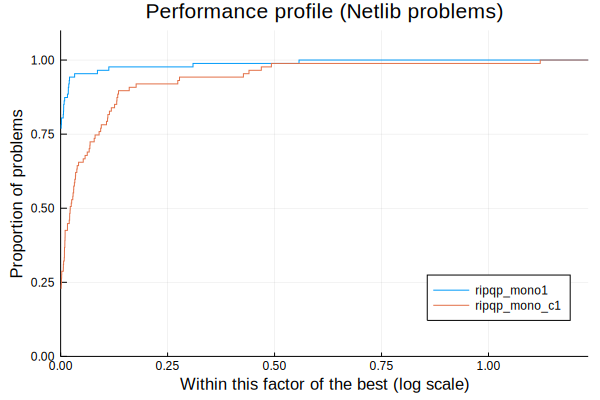

In [32]:
perf = performance_profile(stats_lp, df->df.elapsed_time)
plot!(perf, legend=:bottomright)
title!("Performance profile (Netlib problems)")

In [15]:
rip_mono1bis = copy(rip_mono1);
rip_mono1bis.iter .*= 2;

stats_it = Dict(
                :rip_mono1   => rip_mono1bis,
#                 :rip_monoosK251 => rip_monoosK251,
#                 :rip_monoosK252 => rip_monoosK252,
                :rip_monoIPFK21 => rip_monoIPFK21,
                :rip_monoIPFK22 => rip_monoIPFK22
                )

Dict{Symbol,DataFrame} with 3 entries:
  :rip_mono1      => 87×31 DataFrame. Omitted printing of 24 columns…
  :rip_monoIPFK21 => 87×31 DataFrame. Omitted printing of 24 columns…
  :rip_monoIPFK22 => 87×31 DataFrame. Omitted printing of 24 columns…

┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles C:\Users\Geoffroy Leconte\.julia\packages\BenchmarkProfiles\xB4CX\src\performance_profiles.jl:15


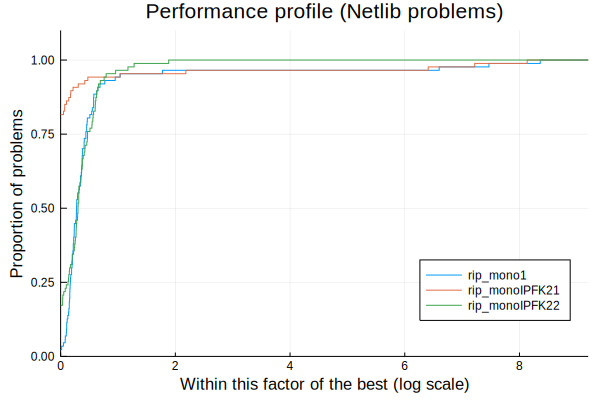

In [16]:
perf2 = performance_profile(stats_it, df->df.iter)
plot!(perf2, legend=:bottomright)
title!("Performance profile (Netlib problems)")

In [26]:
# stats multi
stats_lp = Dict(
                :rip_multiK2      => rip_multiK2,
                :rip_multi_z      => rip_multi_z,
#                 :rip_multi_z2      => rip_multi_z2,
                :rip_multi_r      => rip_multi_r,
#                 :rip_multi_r2      => rip_multi_r2,
#                 :rip_multi_r3      => rip_multi_r3,
#                 :rip_multi_r4      => rip_multi_r4,
               )

Dict{Symbol,DataFrame} with 3 entries:
  :rip_multiK2 => 87×31 DataFrame. Omitted printing of 24 columns…
  :rip_multi_r => 87×31 DataFrame. Omitted printing of 24 columns…
  :rip_multi_z => 87×31 DataFrame. Omitted printing of 24 columns…

┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles C:\Users\Geoffroy Leconte\.julia\packages\BenchmarkProfiles\xB4CX\src\performance_profiles.jl:15


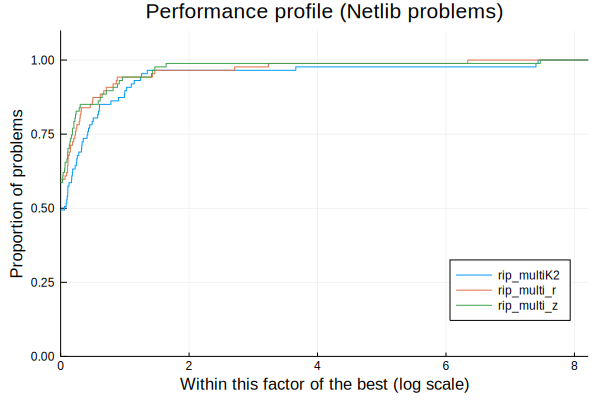

In [27]:
perf = performance_profile(stats_lp, df->df.iter)
plot!(perf, legend=:bottomright)
title!("Performance profile (Netlib problems)")

In [4]:
withenv("COLUMNS" => 400, "LINES" => 200) do
    display(rip_monoosK252)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,25FV47,1571,821,0,acceptable,5501.85,3.45546,244,5.49746e-10,2.41545e-8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
2,2,ADLITTLE,97,56,0,acceptable,225495.0,0.00343108,116,1.11759e-8,9.81599e-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
3,3,AFIRO,32,27,0,acceptable,-464.753,0.000721931,60,1.77636e-15,1.77636e-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
4,4,AGG,163,488,0,acceptable,-3.59918e7,0.035403,188,1.78814e-7,1.86438e-8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
5,5,AGG2,302,516,0,acceptable,-2.02393e7,0.140613,196,1.78629e-6,2.32831e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
6,6,AGG3,302,516,0,acceptable,1.03121e7,0.138989,200,1.43051e-6,1.22016e-9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
7,7,BANDM,472,305,0,acceptable,-158.628,0.025965,168,1.86265e-9,3.75436e-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
8,8,BEACONFD,262,173,0,acceptable,33592.5,0.022253,156,2.38419e-7,9.53674e-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
9,9,BLEND,83,74,0,acceptable,-30.8121,0.00268197,80,2.52608e-11,7.24517e-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
